# Include Toolbox

In [1]:
include("ToolBox/ToolBox.jl")
using .ToolBox

### Define test data

In [2]:
path_img1 = "/Users/simon/Data/Sentinel/S1B_IW_SLC__1SDV_20170315T053950_20170315T054018_004715_0083B0_7EE9.SAFE/measurement/s1b-iw3-slc-vv-20170315t053950-20170315t054018-004715-0083b0-006.tiff"
path_ann_1 = "/Users/simon/Data/Sentinel/S1B_IW_SLC__1SDV_20170315T053950_20170315T054018_004715_0083B0_7EE9.SAFE/annotation/s1b-iw3-slc-vv-20170315t053950-20170315t054018-004715-0083b0-006.xml"
path_pod_1 = "/Users/simon/Data/Sentinel/S1B_OPER_AUX_POEORB_OPOD_20170404T111500_V20170314T225942_20170316T005942.EOF"
dem_path = "/Users/simon/Data/DEM/srtm_38_01/srtm_38_01.tif"

"/Users/simon/Data/DEM/srtm_38_01/srtm_38_01.tif"

In [3]:
reflector_heigt = [42.753,43.282,44.475]
reflector_index_img1 = [[1126,6087],[1123, 6100],[1127, 6111]]
salih = hcat(vcat(reflector_index_img1'...),reflector_heigt)
sali = vcat(reflector_index_img1'...)

3×2 Array{Int64,2}:
 1126  6087
 1123  6100
 1127  6111

In [4]:
view =[1000:1300, 5900:6400];

## Load library

In [5]:
data = Load.s1slc_data(path_img1,view)
meta = Load.s1slc_ann(path_ann_1);
pod = Load.pod(path_pod_1,meta["t_0"]);


 ## SlcUtil library

In [6]:
test = SlcRaw(view,meta,data)

SlcRaw:: S1B-IW-VV-Swath3 2017-03-15T05:39:00 View:[1000:1300,5900:6400]

In [7]:
size(test)

(301, 501)

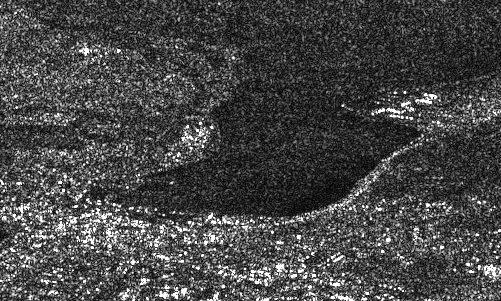

In [8]:
SlcUtil.show_img(test)

## Geometry

In [9]:
using .Geometry

In [10]:
ll = salih2ll(sali,reflector_heigt, pod..., meta)

3×2 Array{Float64,2}:
 56.5619  8.30744
 56.5623  8.30682
 56.5619  8.30604

In [11]:
llh2sali(ll,reflector_heigt,pod...,meta)

3×2 Array{Float64,2}:
 1126.0  6087.0
 1123.0  6100.0
 1127.0  6111.0

## Misc

In [12]:
Misc.print2maps_co(ll[:,1],ll[:,2])

56.561877486841496,8.307440440170094,Corner,#FF0000
56.562312376538316,8.306822143671212,Corner,#FF0000
56.56187918729438,8.30604220751215,Corner,#FF0000


## DEM

In [13]:
footprint = SlcUtil.footprint(meta, view)
latlon_window = ((minimum(footprint[1]),maximum(footprint[1])),(minimum(footprint[2]),maximum(footprint[2])));

In [14]:
lat,lon, dem = Load.dem(dem_path, latlon_window; nan_fill= 0, padding=[50,50]);

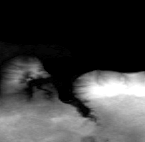

In [15]:
SlcUtil.show_img(dem)

In [16]:
# test

lat_grid,lon_grid = Misc.grid(lat,lon);

In [17]:
lat_dem, lon_dem, h_dem = Misc.flatten(lat,lon,dem);

In [18]:
sali_dem = llh2sali(hcat(lat_dem,lon_dem),h_dem,pod...,meta);

In [19]:
view

2-element Array{UnitRange{Int64},1}:
 1000:1300
 5900:6400

In [20]:
line_range = collect(view[1].start:5:view[1].stop)
sample_range = collect(view[2].start:5:view[2].stop)
dem_intrp = Misc.interp2grid(sali_dem[:,1], sali_dem[:,2], h_dem, line_range, sample_range);